# Iris Classification
This notebook classifies the Iris dataset of flowers, one of scikit-learn's built in datasets

In [2]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn import tree
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from operator import itemgetter
import warnings
import time

/home/nbuser/anaconda3_23/lib/python3.4/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/nbuser/anaconda3_23/lib/python3.4/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/nbuser/anaconda3_23/lib/python3.4/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
data = load_iris()
features = data['data']
feature_names = data['feature_names']
target = data['target']
target_names = data['target_names']

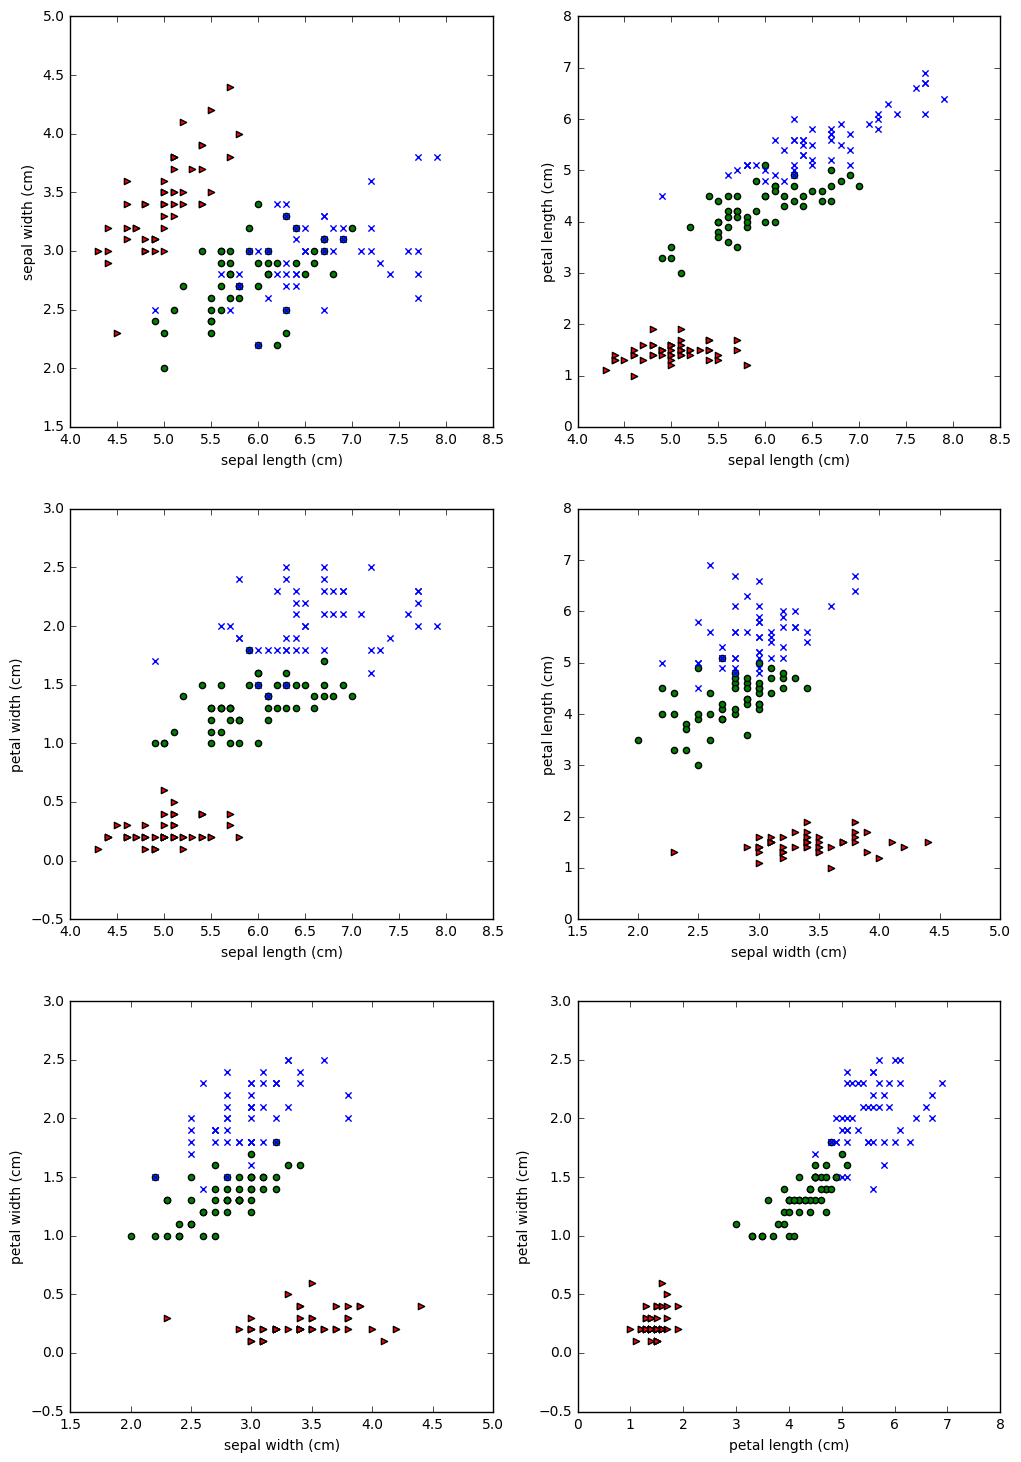

In [3]:
plt.figure(figsize=(12,18))
def iris_exp_plot(subplt_id,xfeat,yfeat):
    for t,marker,c in zip(range(3),">ox","rgb"):
        plt.subplot(subplt_id)
        plt.scatter(features[target==t,xfeat],features[target==t,yfeat],marker=marker,c=c)
        plt.xlabel(feature_names[xfeat])
        plt.ylabel(feature_names[yfeat])

iris_exp_plot('321',0,1)
iris_exp_plot('322',0,2)
iris_exp_plot('323',0,3)
iris_exp_plot('324',1,2)
iris_exp_plot('325',1,3)
iris_exp_plot('326',2,3)

## Decision Tree
In this section we build and tune a decision tree to classify seeds before moving on to Random Forest tuning. First we construct a naive classifier as our performance baseline.

In [21]:
nveclf = tree.DecisionTreeClassifier()
nveclf = nveclf.fit(features,target)
scores = cross_val_score(nveclf,features,target,cv=10,verbose=True)
np.mean(scores)

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


0.95333333333333337

Before tuning parameters, let's check the effect of cross validation folds. For each number of folds `k` we'll calculate the mean score from a grid search over all possible parameters. We'll plots these mean scores to see what effect `k` has on this score.

In [4]:
#first create a grid search
clf = tree.DecisionTreeClassifier()
gs_params = {"criterion": ["gini", "entropy"],
              "min_samples_split": [2, 10, 20],
              "max_depth": [None, 2, 5, 10],
              "min_samples_leaf": [1, 5, 10],
              "max_leaf_nodes": [None, 5, 10, 20],
              }

In [5]:
#create itemgetters for CVScore objects
get_CVparams = itemgetter(0)
get_CVscore = itemgetter(1)

In [6]:
#Check what happens as the number of folds is changed, hypothesis is that the mean validation will peak

#supress depracation warning for grid_scores_ attribute
warnings.filterwarnings("ignore", category=DeprecationWarning)

def get_gridsearch_score(clf, params, cv,n_jobs=1):
    gs = GridSearchCV(clf,params,cv=cv,verbose=True,n_jobs=n_jobs)
    gs.fit(features,target)
    return gs.grid_scores_

def mean_gridscore(grid_scores):
    CV_scores = [get_CVscore(score) for score in grid_scores]
    return np.mean(CV_scores)

In [8]:
mean_cv_scores = []
cv_folds = []
for i in range(3,16):
    mg = mean_gridscore(get_gridsearch_score(clf,gs.param_grid,i))
    mean_cv_scores.append(mg)
    cv_folds.append(i)
    print('For %d folds the mean score from a grid search across parameters is %6.4f' % (i,mg))

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=1)]: Done 864 out of 864 | elapsed:    1.3s finished


For 3 folds the mean score from a grid search across parameters is 0.9556
Fitting 4 folds for each of 288 candidates, totalling 1152 fits


[Parallel(n_jobs=1)]: Done 1152 out of 1152 | elapsed:    1.7s finished


For 4 folds the mean score from a grid search across parameters is 0.9556
Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=1)]: Done 1440 out of 1440 | elapsed:    2.1s finished


For 5 folds the mean score from a grid search across parameters is 0.9465
Fitting 6 folds for each of 288 candidates, totalling 1728 fits


[Parallel(n_jobs=1)]: Done 1728 out of 1728 | elapsed:    2.6s finished


For 6 folds the mean score from a grid search across parameters is 0.9577
Fitting 7 folds for each of 288 candidates, totalling 2016 fits


[Parallel(n_jobs=1)]: Done 2016 out of 2016 | elapsed:    3.0s finished


For 7 folds the mean score from a grid search across parameters is 0.9415
Fitting 8 folds for each of 288 candidates, totalling 2304 fits


[Parallel(n_jobs=1)]: Done 2304 out of 2304 | elapsed:    3.5s finished


For 8 folds the mean score from a grid search across parameters is 0.9462
Fitting 9 folds for each of 288 candidates, totalling 2592 fits


[Parallel(n_jobs=1)]: Done 2592 out of 2592 | elapsed:    4.0s finished


For 9 folds the mean score from a grid search across parameters is 0.9565
Fitting 10 folds for each of 288 candidates, totalling 2880 fits


[Parallel(n_jobs=1)]: Done 2880 out of 2880 | elapsed:    4.3s finished


For 10 folds the mean score from a grid search across parameters is 0.9564
Fitting 11 folds for each of 288 candidates, totalling 3168 fits


[Parallel(n_jobs=1)]: Done 3168 out of 3168 | elapsed:    4.9s finished


For 11 folds the mean score from a grid search across parameters is 0.9583
Fitting 12 folds for each of 288 candidates, totalling 3456 fits


[Parallel(n_jobs=1)]: Done 3456 out of 3456 | elapsed:    5.3s finished


For 12 folds the mean score from a grid search across parameters is 0.9570
Fitting 13 folds for each of 288 candidates, totalling 3744 fits


[Parallel(n_jobs=1)]: Done 3744 out of 3744 | elapsed:    5.6s finished


For 13 folds the mean score from a grid search across parameters is 0.9445
Fitting 14 folds for each of 288 candidates, totalling 4032 fits


[Parallel(n_jobs=1)]: Done 4032 out of 4032 | elapsed:    6.1s finished


For 14 folds the mean score from a grid search across parameters is 0.9534
Fitting 15 folds for each of 288 candidates, totalling 4320 fits
For 15 folds the mean score from a grid search across parameters is 0.9534


[Parallel(n_jobs=1)]: Done 4320 out of 4320 | elapsed:    6.6s finished


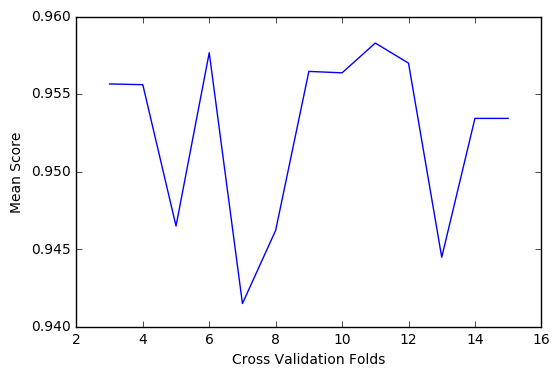

In [9]:
plt.plot(cv_folds,mean_cv_scores)
plt.xlabel('Cross Validation Folds')
plt.ylabel('Mean Score')
plt.show()

The score varies within a very small range for different numbers of folds, we choose 10 arbitrarily. We'll now plot some of the parameters from the grid search to understand how these affect the mean validation score and fix some parameters.

In [15]:
#plot histogram to show distribution of scores for each parameter setting, filtering to the top_n scores
def plot_param_hists(GridSearchCV):
   
    fig, axarr = plt.subplots(len(gs.param_grid),sharex=False,figsize=(12,30))
    for i,prm in enumerate(gs.param_grid.keys()):
        prm_scores = []
        for j, val in enumerate(gs.param_grid[prm]):
            prm_scores.append(get_gridscores(GridSearchCV,prm,val))
        axarr[i].hist(np.vstack(prm_scores).T,label=gs.param_grid[prm])
        axarr[i].set_title('Distribution of scores for %s parameter' % prm)
        axarr[i].legend(loc='best')
    plt.show()

In [7]:
def get_gridscores(GridSearchCV,prm,val):
    grid_scores = GridSearchCV.grid_scores_
    scores = [get_CVscore(score) for score in grid_scores if get_CVparams(score)[prm]==val]   
    return scores

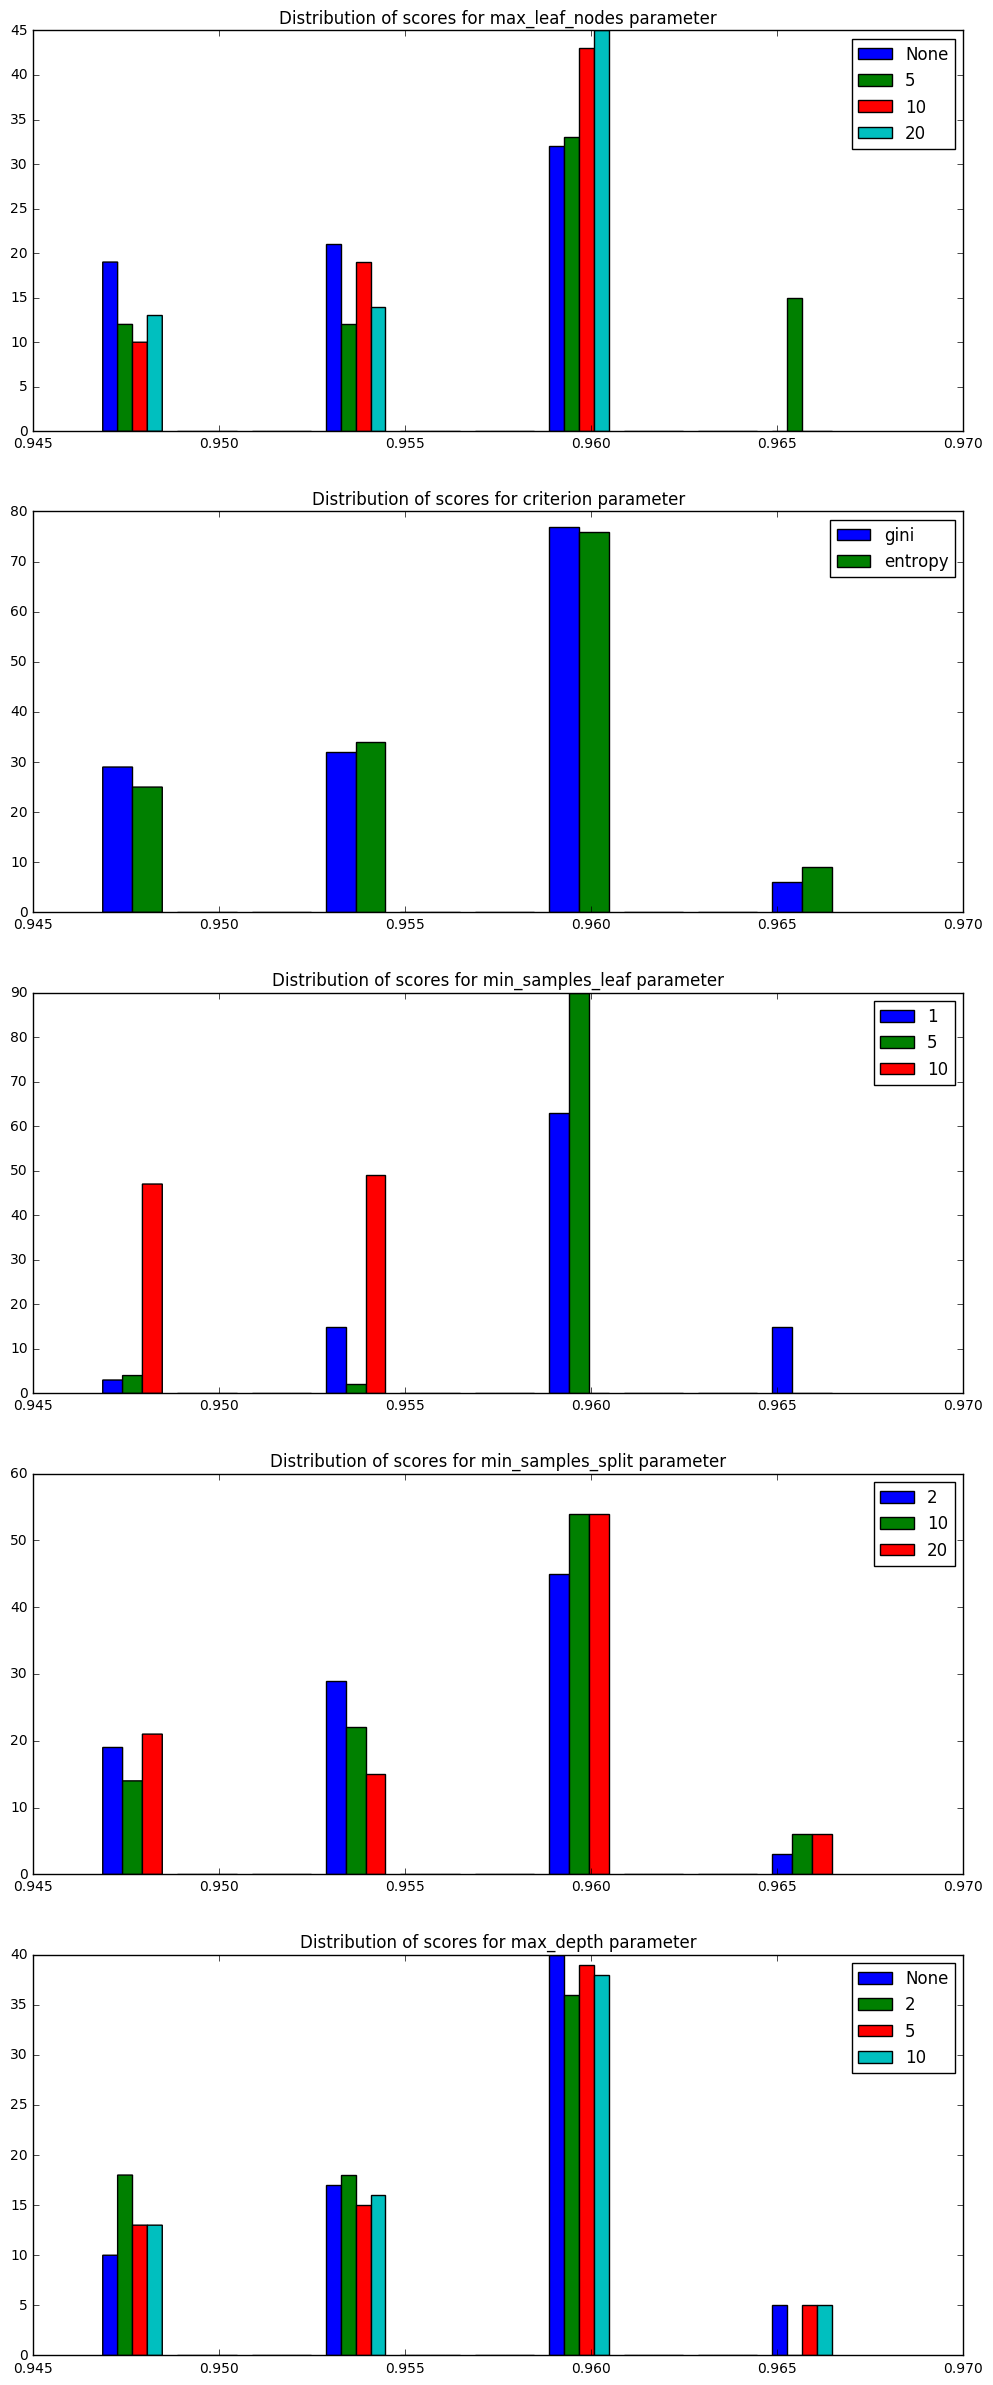

In [12]:
plot_param_hists(gs)

Some charts above are informative, indicating that parameters are better than others, but not all are conclusive. Let's also look at the top 20 scores when choosing parameters.

In [13]:
#sort _CVScoreTuple objetcs in gridscores by mean validation score, indexed by 1
sorted(gs.grid_scores_,key=itemgetter(1),reverse=True)[:30]

[mean: 0.96667, std: 0.03333, params: {'min_samples_split': 10, 'criterion': 'gini', 'max_leaf_nodes': 5, 'min_samples_leaf': 1, 'max_depth': None},
 mean: 0.96667, std: 0.03333, params: {'min_samples_split': 20, 'criterion': 'gini', 'max_leaf_nodes': 5, 'min_samples_leaf': 1, 'max_depth': None},
 mean: 0.96667, std: 0.03333, params: {'min_samples_split': 10, 'criterion': 'gini', 'max_leaf_nodes': 5, 'min_samples_leaf': 1, 'max_depth': 5},
 mean: 0.96667, std: 0.03333, params: {'min_samples_split': 20, 'criterion': 'gini', 'max_leaf_nodes': 5, 'min_samples_leaf': 1, 'max_depth': 5},
 mean: 0.96667, std: 0.03333, params: {'min_samples_split': 10, 'criterion': 'gini', 'max_leaf_nodes': 5, 'min_samples_leaf': 1, 'max_depth': 10},
 mean: 0.96667, std: 0.03333, params: {'min_samples_split': 20, 'criterion': 'gini', 'max_leaf_nodes': 5, 'min_samples_leaf': 1, 'max_depth': 10},
 mean: 0.96667, std: 0.03333, params: {'min_samples_split': 2, 'criterion': 'entropy', 'max_leaf_nodes': 5, 'min_sam

From the charts above and inspection of the top 20 results it seems fair to conclude, in order of conclusiveness:
  * We should choose `max_leaf_nodes` to be `5`. It looks like allowing trees to to extend over 5 leaves is causing them to overfit.
  * We should choose `min_samples_leaf` to be `1`. That makes sense as increasing this to `5` is presumably forcing us to accept false positives and false negatives. There may be a value higher than `1` which does not require this compromise though.
  * Higher values seem to produce better results for `min_samples_split`. Once we allow the tree to split on two cases we are probably overfitting so this makes sense. There doesn't seem to be much difference in performance from setting this to `10` or `20`, but 20 gave slightly better performance over the whole grid search so we'll select that.
  * Allowing the tree to be deeper appears to give better results. We'll set `max_depth` to `None`becuase this gives slightly better accuracy than `10` overall.
  * The method used to split nodes, the `criterion` seems least clear. The chart suggests that the entropy approach gives better overall results, and looking at the top results is inconclusive, so we'll chose `entropy`.
 
Now we've optimised parameters we can fit the tree on the whole set of data and see what difference the optimisation makes. 

In [14]:
#create optimised classifier
optclf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=None,min_samples_split=20,min_samples_leaf=1,max_leaf_nodes=5)
optclf.fit(features,target)
scores = cross_val_score(optclf,features,target,cv=10,verbose=True)
np.mean(scores)

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


0.96666666666666656

So we have improved the model accuracy by 1.3% by doing a grid search, plotting the effects of parameters and selecting the optimum parameters. We also know from the grid search that this is actaually the highest possible score for 10-fold cross validation. We'll now tune a Random Forest model on the same data and compare performance

# Random Forest
We'll use the same approach as above, doing a grid search across parameters to optimise them. It's more computationally expensive to do this for random forests compared to decision trees though because we are effectively building `B` decision trees, where `B` is the number of trees in our forest. From doing some research it seems that there are three parameters most likely to affect performance:
  * The number of trees `n_estimators`
  * The `criterion` that defines splits
  * The `max_features` that defines how many features to consider at each split

Firstly, let's create a naive classifier to use as our baseline.

In [24]:
nveclf = RandomForestClassifier(random_state=0,max_features='sqrt')
scores = cross_val_score(nveclf,features,target,cv=10,verbose=True)
np.mean(scores)

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


0.95999999999999996

We'll attempt to improve this score of 0.96 by tuning the tree. Clearly this is already quite a high score so any tuning may have minimal impact. We'll do a grid search and plot the mean scores from each parameter combination:
  * The `n_estimators` parameter we ideally want to be as high as possible as this increases the performance of the classifier, but makes the gridsearch and classifier slower. Let's time a few grid searches and vary the `n_estimators`.It will be best to do this with the number of parameters we are planning to use for our grid search
  * We'll search across both `gini` and `entropy` criteria
  * We have 4 features so are limited to using either 2 or 3 of those as `max_features`. Using 4 would result in correlation across trees.
  * We have 150 samples in our dataset so the `min_samples_leaf` will have to be quite small, likewise for `min_samples_split`
  * We chose not to set the `max_depth` parameter as the `min_samples_split` works similarly to 'prune' the tree

In [4]:
gs_params = {'criterion': ['gini','entropy'],
             'max_features': [0.5,0.75], 
              'min_samples_leaf': [5,10,15,20,25],
             'min_samples_split': [15,20,25]}

In [67]:
tree_range = [20,30,50,100,200]
rs_range = range(0,10)
mean_scores = []

#loop through several random states
for rs in rs_range:
    rs_mean_scores = []
    for i in tree_range:
        clf = RandomForestClassifier(n_estimators=i,random_state=rs)
        t0 = time.time()
        gridscores = get_gridsearch_score(clf,gs_params,cv=10,n_jobs=4)
        t1 = time.time()
        ms = mean_gridscore(gridscores)
        rs_mean_scores.append(ms)
        print('Grid search with %d estimators took %4.2fs and gave a mean score of %10.8f' % (i,t1-t0,ms))
    mean_scores.append(rs_mean_scores)

Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    2.6s


Grid search with 20 estimators took 5.58s and gave a mean score of 0.95000000
Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=4)]: Done 600 out of 600 | elapsed:    5.4s finished
[Parallel(n_jobs=4)]: Done 212 tasks      | elapsed:    2.9s
[Parallel(n_jobs=4)]: Done 600 out of 600 | elapsed:    7.9s finished


Grid search with 30 estimators took 8.17s and gave a mean score of 0.95433333
Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=4)]: Done 144 tasks      | elapsed:    3.1s


Grid search with 50 estimators took 13.01s and gave a mean score of 0.95466667
Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=4)]: Done 600 out of 600 | elapsed:   12.8s finished
[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    3.4s
[Parallel(n_jobs=4)]: Done 376 tasks      | elapsed:   15.8s
[Parallel(n_jobs=4)]: Done 600 out of 600 | elapsed:   25.2s finished


Grid search with 100 estimators took 25.53s and gave a mean score of 0.95366667
Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.7s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   16.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   36.9s
[Parallel(n_jobs=4)]: Done 600 out of 600 | elapsed:   50.0s finished


Grid search with 200 estimators took 50.40s and gave a mean score of 0.95700000
Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=4)]: Done 248 tasks      | elapsed:    2.4s
[Parallel(n_jobs=4)]: Done 600 out of 600 | elapsed:    5.5s finished


Grid search with 20 estimators took 5.76s and gave a mean score of 0.95422222
Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=4)]: Done 212 tasks      | elapsed:    2.9s


Grid search with 30 estimators took 8.17s and gave a mean score of 0.95522222
Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=4)]: Done 600 out of 600 | elapsed:    8.0s finished
[Parallel(n_jobs=4)]: Done 144 tasks      | elapsed:    3.2s
[Parallel(n_jobs=4)]: Done 600 out of 600 | elapsed:   12.9s finished


Grid search with 50 estimators took 13.11s and gave a mean score of 0.95500000
Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    3.4s
[Parallel(n_jobs=4)]: Done 376 tasks      | elapsed:   15.8s
[Parallel(n_jobs=4)]: Done 600 out of 600 | elapsed:   25.2s finished


Grid search with 100 estimators took 25.51s and gave a mean score of 0.95566667
Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.7s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   15.9s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   36.8s
[Parallel(n_jobs=4)]: Done 600 out of 600 | elapsed:   50.0s finished


Grid search with 200 estimators took 50.47s and gave a mean score of 0.95688889
Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    2.7s


Grid search with 20 estimators took 5.68s and gave a mean score of 0.95022222
Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=4)]: Done 600 out of 600 | elapsed:    5.5s finished
[Parallel(n_jobs=4)]: Done 212 tasks      | elapsed:    2.8s


Grid search with 30 estimators took 7.87s and gave a mean score of 0.95066667
Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=4)]: Done 600 out of 600 | elapsed:    7.7s finished
[Parallel(n_jobs=4)]: Done 144 tasks      | elapsed:    3.2s
[Parallel(n_jobs=4)]: Done 600 out of 600 | elapsed:   12.6s finished


Grid search with 50 estimators took 12.92s and gave a mean score of 0.95200000
Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    3.3s
[Parallel(n_jobs=4)]: Done 376 tasks      | elapsed:   15.8s
[Parallel(n_jobs=4)]: Done 600 out of 600 | elapsed:   25.1s finished


Grid search with 100 estimators took 25.41s and gave a mean score of 0.95266667
Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.6s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   16.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   36.6s
[Parallel(n_jobs=4)]: Done 600 out of 600 | elapsed:   49.7s finished


Grid search with 200 estimators took 50.16s and gave a mean score of 0.95222222
Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    2.6s
[Parallel(n_jobs=4)]: Done 600 out of 600 | elapsed:    5.4s finished


Grid search with 20 estimators took 5.67s and gave a mean score of 0.95177778
Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=4)]: Done 144 tasks      | elapsed:    2.0s


Grid search with 30 estimators took 8.09s and gave a mean score of 0.95533333
Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=4)]: Done 600 out of 600 | elapsed:    7.9s finished
[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    1.7s
[Parallel(n_jobs=4)]: Done 376 tasks      | elapsed:    8.1s
[Parallel(n_jobs=4)]: Done 600 out of 600 | elapsed:   12.7s finished


Grid search with 50 estimators took 13.00s and gave a mean score of 0.95533333
Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    3.4s
[Parallel(n_jobs=4)]: Done 376 tasks      | elapsed:   15.9s
[Parallel(n_jobs=4)]: Done 600 out of 600 | elapsed:   25.3s finished


Grid search with 100 estimators took 25.60s and gave a mean score of 0.95400000
Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.6s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   16.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   36.7s
[Parallel(n_jobs=4)]: Done 600 out of 600 | elapsed:   50.0s finished


Grid search with 200 estimators took 50.36s and gave a mean score of 0.95466667
Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    2.6s


Grid search with 20 estimators took 5.65s and gave a mean score of 0.95544444
Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=4)]: Done 600 out of 600 | elapsed:    5.4s finished
[Parallel(n_jobs=4)]: Done 212 tasks      | elapsed:    3.0s


Grid search with 30 estimators took 8.07s and gave a mean score of 0.95733333
Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=4)]: Done 600 out of 600 | elapsed:    7.9s finished
[Parallel(n_jobs=4)]: Done 144 tasks      | elapsed:    3.2s


Grid search with 50 estimators took 13.10s and gave a mean score of 0.95411111
Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=4)]: Done 600 out of 600 | elapsed:   12.9s finished
[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    3.3s
[Parallel(n_jobs=4)]: Done 376 tasks      | elapsed:   15.8s
[Parallel(n_jobs=4)]: Done 600 out of 600 | elapsed:   25.2s finished


Grid search with 100 estimators took 25.51s and gave a mean score of 0.95000000
Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.7s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   16.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   36.8s
[Parallel(n_jobs=4)]: Done 600 out of 600 | elapsed:   50.1s finished


Grid search with 200 estimators took 50.45s and gave a mean score of 0.94922222
Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    2.6s


Grid search with 20 estimators took 5.66s and gave a mean score of 0.94811111
Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=4)]: Done 600 out of 600 | elapsed:    5.5s finished
[Parallel(n_jobs=4)]: Done 212 tasks      | elapsed:    2.9s


Grid search with 30 estimators took 8.07s and gave a mean score of 0.95266667
Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=4)]: Done 600 out of 600 | elapsed:    7.9s finished
[Parallel(n_jobs=4)]: Done 144 tasks      | elapsed:    3.1s
[Parallel(n_jobs=4)]: Done 600 out of 600 | elapsed:   12.9s finished


Grid search with 50 estimators took 13.11s and gave a mean score of 0.95277778
Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    3.3s
[Parallel(n_jobs=4)]: Done 376 tasks      | elapsed:   15.9s
[Parallel(n_jobs=4)]: Done 600 out of 600 | elapsed:   25.3s finished


Grid search with 100 estimators took 25.61s and gave a mean score of 0.95066667
Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.6s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   15.9s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   36.5s
[Parallel(n_jobs=4)]: Done 600 out of 600 | elapsed:   49.7s finished


Grid search with 200 estimators took 50.19s and gave a mean score of 0.95111111
Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=4)]: Done 212 tasks      | elapsed:    2.0s


Grid search with 20 estimators took 5.57s and gave a mean score of 0.95966667
Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=4)]: Done 600 out of 600 | elapsed:    5.4s finished
[Parallel(n_jobs=4)]: Done 212 tasks      | elapsed:    3.0s
[Parallel(n_jobs=4)]: Done 600 out of 600 | elapsed:    7.9s finished


Grid search with 30 estimators took 8.17s and gave a mean score of 0.95833333
Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=4)]: Done 144 tasks      | elapsed:    3.2s
[Parallel(n_jobs=4)]: Done 600 out of 600 | elapsed:   12.7s finished


Grid search with 50 estimators took 12.90s and gave a mean score of 0.95800000
Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    3.4s
[Parallel(n_jobs=4)]: Done 376 tasks      | elapsed:   15.8s
[Parallel(n_jobs=4)]: Done 600 out of 600 | elapsed:   25.1s finished


Grid search with 100 estimators took 25.40s and gave a mean score of 0.95544444
Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.6s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   15.9s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   36.7s
[Parallel(n_jobs=4)]: Done 600 out of 600 | elapsed:   49.7s finished


Grid search with 200 estimators took 50.15s and gave a mean score of 0.95588889
Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    2.7s


Grid search with 20 estimators took 5.56s and gave a mean score of 0.95266667
Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=4)]: Done 600 out of 600 | elapsed:    5.4s finished
[Parallel(n_jobs=4)]: Done 144 tasks      | elapsed:    1.9s
[Parallel(n_jobs=4)]: Done 600 out of 600 | elapsed:    7.9s finished


Grid search with 30 estimators took 8.20s and gave a mean score of 0.95144444
Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=4)]: Done 144 tasks      | elapsed:    3.3s
[Parallel(n_jobs=4)]: Done 600 out of 600 | elapsed:   13.0s finished


Grid search with 50 estimators took 13.20s and gave a mean score of 0.95200000
Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    3.4s
[Parallel(n_jobs=4)]: Done 376 tasks      | elapsed:   16.1s
[Parallel(n_jobs=4)]: Done 600 out of 600 | elapsed:   25.4s finished


Grid search with 100 estimators took 25.68s and gave a mean score of 0.95211111
Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.7s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   16.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   36.7s
[Parallel(n_jobs=4)]: Done 600 out of 600 | elapsed:   49.8s finished


Grid search with 200 estimators took 50.28s and gave a mean score of 0.95166667
Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    2.7s


Grid search with 20 estimators took 5.66s and gave a mean score of 0.95333333
Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=4)]: Done 600 out of 600 | elapsed:    5.5s finished
[Parallel(n_jobs=4)]: Done 212 tasks      | elapsed:    2.9s


Grid search with 30 estimators took 8.07s and gave a mean score of 0.95455556
Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=4)]: Done 600 out of 600 | elapsed:    7.9s finished
[Parallel(n_jobs=4)]: Done 144 tasks      | elapsed:    3.2s
[Parallel(n_jobs=4)]: Done 600 out of 600 | elapsed:   12.9s finished


Grid search with 50 estimators took 13.22s and gave a mean score of 0.95511111
Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    3.4s
[Parallel(n_jobs=4)]: Done 376 tasks      | elapsed:   15.9s
[Parallel(n_jobs=4)]: Done 600 out of 600 | elapsed:   25.4s finished


Grid search with 100 estimators took 25.70s and gave a mean score of 0.95500000
Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.6s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   16.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   36.5s
[Parallel(n_jobs=4)]: Done 600 out of 600 | elapsed:   49.8s finished


Grid search with 200 estimators took 50.21s and gave a mean score of 0.95733333
Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=4)]: Done 212 tasks      | elapsed:    2.0s
[Parallel(n_jobs=4)]: Done 600 out of 600 | elapsed:    5.3s finished


Grid search with 20 estimators took 5.55s and gave a mean score of 0.95522222
Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=4)]: Done 144 tasks      | elapsed:    2.0s
[Parallel(n_jobs=4)]: Done 600 out of 600 | elapsed:    7.7s finished


Grid search with 30 estimators took 7.97s and gave a mean score of 0.94955556
Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=4)]: Done 144 tasks      | elapsed:    3.2s


Grid search with 50 estimators took 13.11s and gave a mean score of 0.95255556
Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=4)]: Done 600 out of 600 | elapsed:   12.9s finished
[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    3.4s
[Parallel(n_jobs=4)]: Done 376 tasks      | elapsed:   16.0s
[Parallel(n_jobs=4)]: Done 600 out of 600 | elapsed:   25.3s finished


Grid search with 100 estimators took 25.59s and gave a mean score of 0.95433333
Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.7s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   16.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   36.8s
[Parallel(n_jobs=4)]: Done 600 out of 600 | elapsed:   49.9s finished


Grid search with 200 estimators took 50.38s and gave a mean score of 0.95766667


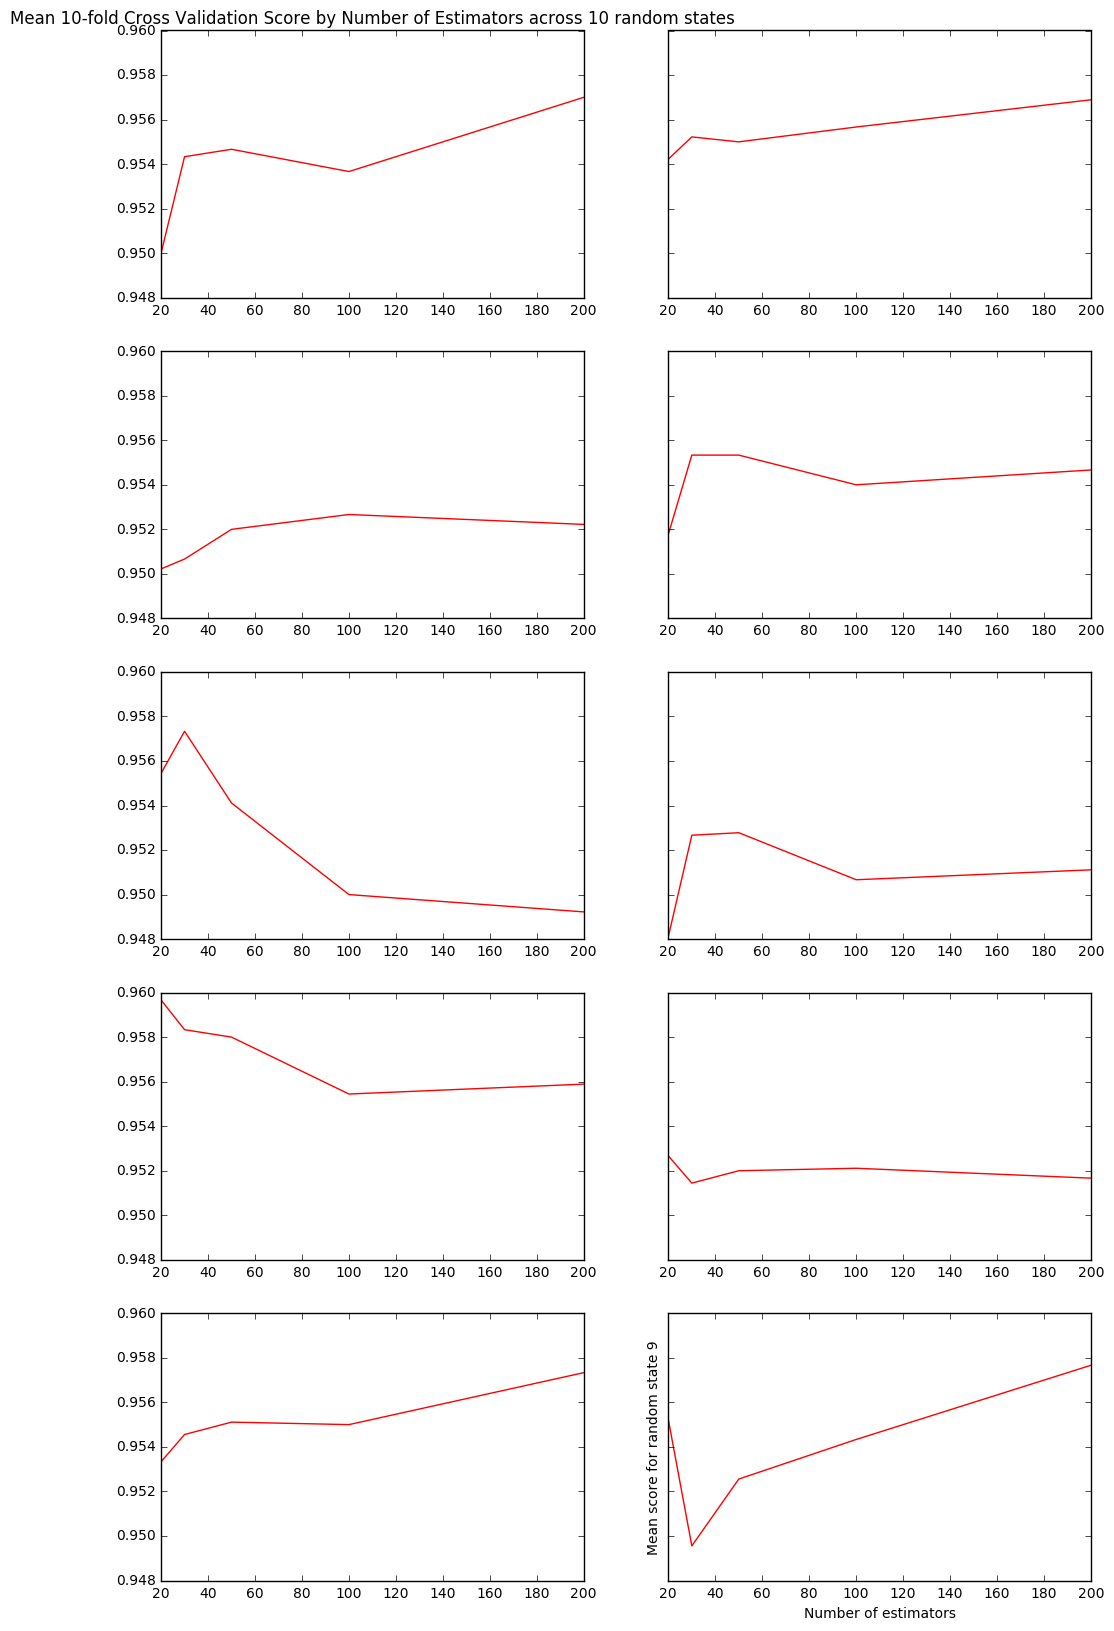

In [71]:
fig, axarr = plt.subplots(5,2,figsize=(12,20),sharey=True)

for rs in rs_range:
    #identify which subplot 
    spx = int(rs/2)
    spy = rs % 2
    
    axarr[spx][spy].plot(tree_range,mean_scores[rs],'r')
    plt.xlabel('Number of estimators')
    plt.ylabel('Mean score for random state %d' % rs)

axarr[0][0].set_title('Mean 10-fold Cross Validation Score by Number of Estimators across 10 random states')
plt.show()

For information I'll also plot an aggregated version.

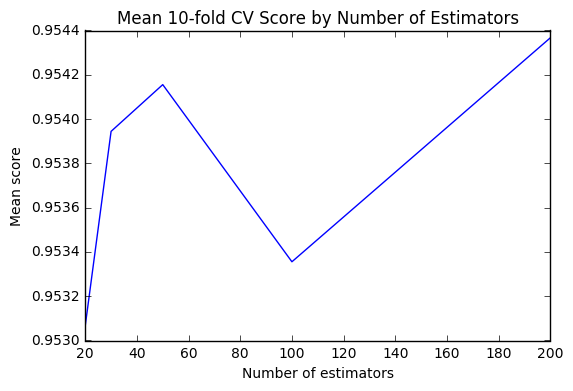

In [79]:
mean_scores_arr = np.array(mean_scores)
plt.plot(tree_range,mean_scores_arr.mean(axis=0))
plt.title('Mean 10-fold CV Score by Number of Estimators')
plt.xlabel('Number of estimators')
plt.ylabel('Mean score')
plt.show()

We can see from the plots above that even using cross validation there is still a lot of random variation. We'll choose 200 for `n_estimators` as the mean score improves generally as the number of estimators rises. This is what should happen - Random Forests are robust to overfitting. We'll do a gridsearch now across the other parameters using a range of random states.

In [17]:
clf = RandomForestClassifier(random_state=1,n_estimators=200)
gs = GridSearchCV(clf,gs_params,n_jobs=4,cv=10)
gs.fit(features,target)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=1, oob_score=False, random_state=1,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=4,
       param_grid={'max_features': [0.5, 0.75], 'min_samples_split': [15, 20, 25], 'min_samples_leaf': [5, 10, 15, 20, 25], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [ ]:
rs_range = range(0,20)
mean_scores = []

for i, prm in enumerate(gs_params.keys()):
    mean_scores[i] = [] 
    for j, val in enumerate(gs_params[prm]):
            mean_scores[i][j]=[]

#loop through several random states
for rs in rs_range:
    rs_mean_scores = []
    clf = RandomForestClassifier(n_estimators=200,random_state=rs)
    gs = GridSearchCV(clf,gs_params,n_jobs=4,cv=10)
    gs.fit(features,target)
    for i, prm in enumerate(gs_params.keys()):
        for j, val in enumerate(gs_params[prm]):
            scores = get_gridscores(gs,prm,val)
            mean_scores[i][j].append(scores)